In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,36.377559,9.609941,9.609936,3.785409,83.384647,0.933333,0.000000,6.797519,...,38.227175,5.886975,10.880317,649.351702,8.190908,0.122087,2.096850,1.314910,2,no stress
369285,984.266492,978.622945,74.918433,13.762274,13.761705,5.443754,61.314243,6.333333,0.200000,9.734243,...,2.573834,0.112964,0.357547,2278.456746,278.683532,0.003588,2.131264,1.175975,2,no stress
369286,1025.499743,1024.968400,95.309200,23.051254,23.050395,4.134664,59.028594,30.400000,2.066667,16.304530,...,4.287216,0.098983,0.180070,4331.259564,554.340761,0.001804,2.215643,1.140232,2,no stress
369287,798.123167,803.559610,78.449897,16.736686,16.736657,4.687302,75.978628,10.000000,1.466667,11.838553,...,46.636158,1.591647,3.522995,2930.056129,27.384942,0.036516,2.091628,1.181937,2,no stress


In [4]:
test

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,13.150967,...,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,2,time pressure
41029,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,14.578861,...,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,2,interruption
41030,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,15.346606,...,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,2,no stress
41031,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,7.979232,...,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,2,no stress


(array([  429.,  1963.,  1359.,  1176.,  2599.,  2995.,  3345.,  3927.,
         4845.,  6109., 12126., 23956., 14003., 18472., 22694., 24320.,
        23590., 19757., 18251., 12785., 14102., 15305., 15011., 10160.,
        13157., 10330.,  9557.,  7893.,  8985.,  6998.,  6900.,  5763.,
         3266.,  4163.,  2852.,  2116.,  2358.,  2112.,  1936.,  1582.,
         1129.,  1327.,  1227.,   802.,   317.,   350.,   241.,   102.,
           39.,   508.]),
 array([ 547.49222131,  562.98271602,  578.47321074,  593.96370546,
         609.45420017,  624.94469489,  640.4351896 ,  655.92568432,
         671.41617904,  686.90667375,  702.39716847,  717.88766319,
         733.3781579 ,  748.86865262,  764.35914733,  779.84964205,
         795.34013677,  810.83063148,  826.3211262 ,  841.81162092,
         857.30211563,  872.79261035,  888.28310506,  903.77359978,
         919.2640945 ,  934.75458921,  950.24508393,  965.73557865,
         981.22607336,  996.71656808, 1012.20706279, 1027.69755751

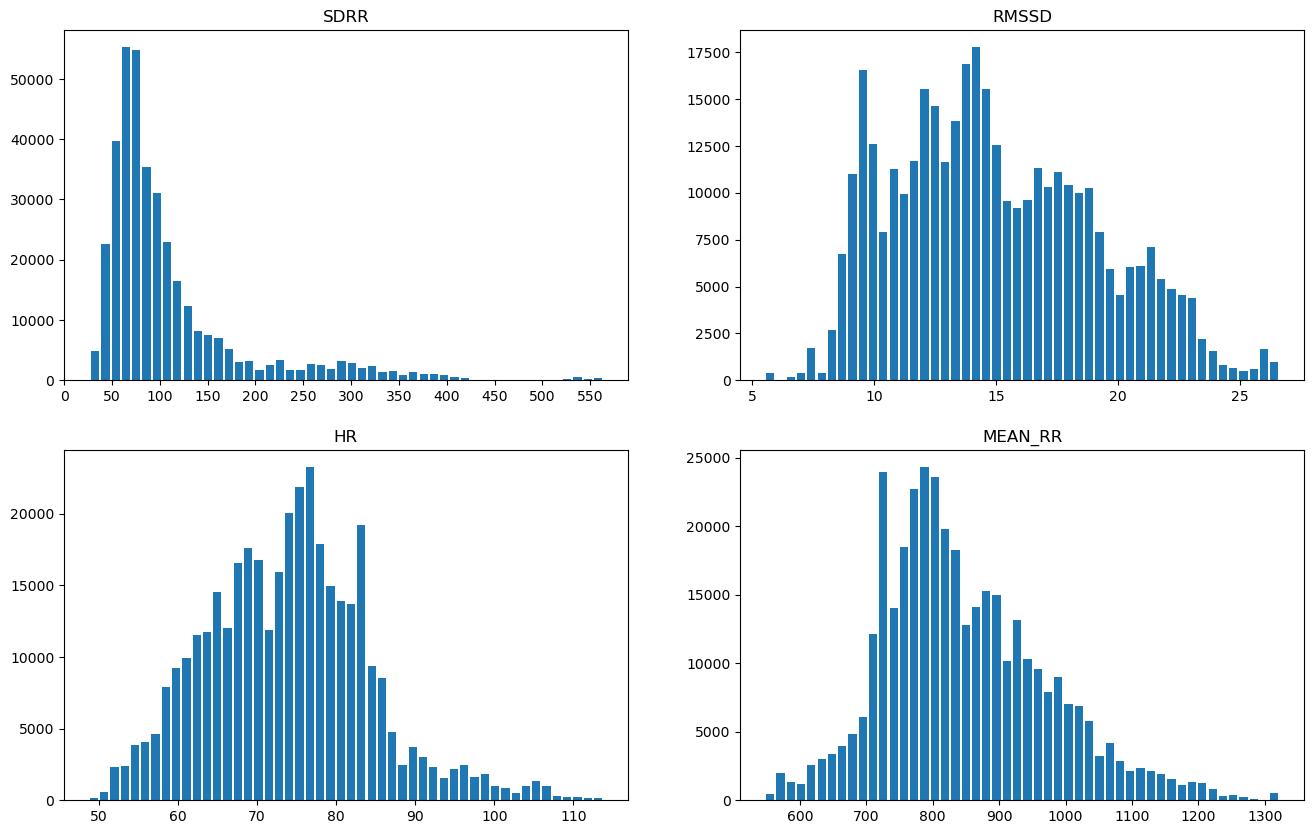

In [5]:
plt.figure(figsize=(16,10))

ax1=plt.subplot(2,2,1)
plt.title('SDRR')
plt.hist(train['SDRR'], histtype='barstacked', rwidth=0.8,bins=50)
ax1.set_xticks(np.arange(0, train['SDRR'].max(), 50))

ax2=plt.subplot(2,2,2)
plt.title('RMSSD')
plt.hist(train['RMSSD'], histtype='barstacked', rwidth=0.8, bins=50)

ax3=plt.subplot(2,2,3)
plt.title('HR')
plt.hist(train['HR'], histtype='barstacked', rwidth=0.8, bins=50)

ax4=plt.subplot(2,2,4)
plt.title('MEAN_RR')
plt.hist(train['MEAN_RR'], histtype='barstacked', rwidth=0.8, bins=50)

In [6]:
train['condition'].unique()

array(['no stress', 'interruption', 'time pressure'], dtype=object)

In [7]:
LE = preprocessing.LabelEncoder()
LE.fit(train['condition'])
list(LE.classes_)

['interruption', 'no stress', 'time pressure']

In [8]:
train['condition'] = LE.transform(train['condition'])
test['condition'] = LE.transform(test['condition'])

In [9]:
train['condition'].unique()

array([1, 0, 2])

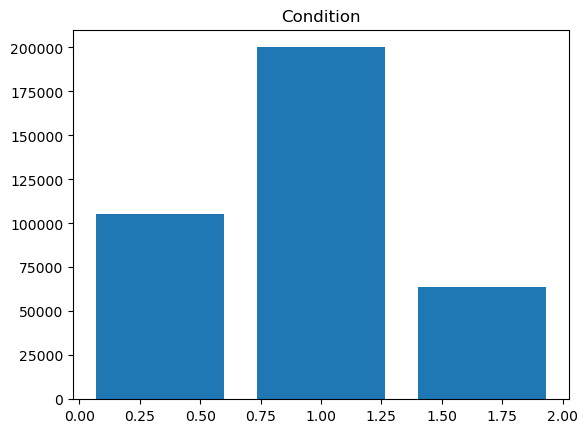

In [10]:
plt.title("Condition")
plt.hist(train['condition'], histtype='barstacked', rwidth=0.8, bins=3)
plt.show()

In [11]:
subCols1 = ['MEAN_RR', 'SDRR', 'RMSSD']
subCols2 = subCols1 + ['condition']

In [12]:
train2 = train[subCols2]
train2

,MEAN_RR,SDRR,RMSSD,condition
0,885.157845,140.972741,15.554505,1
1,939.425371,81.317742,12.964439,0
2,898.186047,84.497236,16.305279,0
3,881.757865,90.370537,15.720468,1
4,809.625331,62.766242,19.213819,1
...,...,...,...,...
369284,721.396910,36.377559,9.609941,1
369285,984.266492,74.918433,13.762274,1
369286,1025.499743,95.309200,23.051254,1
369287,798.123167,78.449897,16.736686,1


            MEAN_RR      SDRR     RMSSD  condition
MEAN_RR    1.000000  0.462882  0.333046   0.117533
SDRR       0.462882  1.000000  0.262933   0.088569
RMSSD      0.333046  0.262933  1.000000  -0.129092
condition  0.117533  0.088569 -0.129092   1.000000


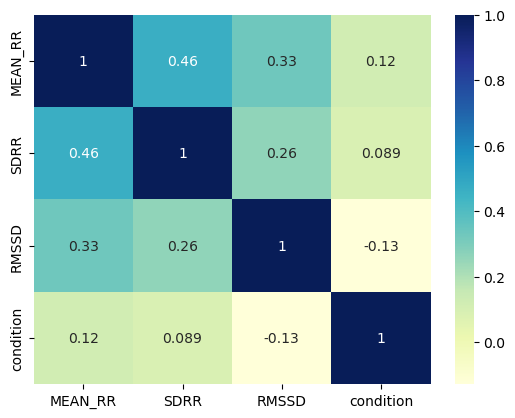

In [13]:
print(train2.corr())
dataplot = sns.heatmap(train2.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [14]:
(X_train, X_test, y_train, y_test) = train_test_split(train[subCols1], train['condition'], test_size = 0.2)

In [15]:
X_train = train[subCols1]
X_train

,MEAN_RR,SDRR,RMSSD
0,885.157845,140.972741,15.554505
1,939.425371,81.317742,12.964439
2,898.186047,84.497236,16.305279
3,881.757865,90.370537,15.720468
4,809.625331,62.766242,19.213819
...,...,...,...
369284,721.396910,36.377559,9.609941
369285,984.266492,74.918433,13.762274
369286,1025.499743,95.309200,23.051254
369287,798.123167,78.449897,16.736686


In [16]:
y_train = train['condition']
y_train

0         1
1         0
2         0
3         1
4         1
         ..
369284    1
369285    1
369286    1
369287    1
369288    1
Name: condition, Length: 369289, dtype: int32

In [17]:
X_test = test[subCols1]
X_test

,MEAN_RR,SDRR,RMSSD
0,721.901897,74.722315,12.361264
1,843.538633,58.499429,19.298880
2,958.523868,132.849110,21.342715
3,824.838669,117.822094,11.771814
4,756.707933,143.968457,13.357748
...,...,...,...
41028,1118.406543,113.955632,18.592177
41029,855.991173,296.763366,20.623727
41030,689.388662,133.815714,21.699038
41031,761.421571,60.792671,11.280586


In [18]:
y_test = test['condition']
y_test

0        1
1        2
2        1
3        1
4        0
        ..
41028    2
41029    0
41030    1
41031    1
41032    2
Name: condition, Length: 41033, dtype: int32

In [19]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred

array([1, 2, 1, ..., 1, 1, 2])

In [22]:
print(f"Accuracy Score={accuracy_score(y_test, y_pred)}")

Accuracy Score=0.9992688811444447


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



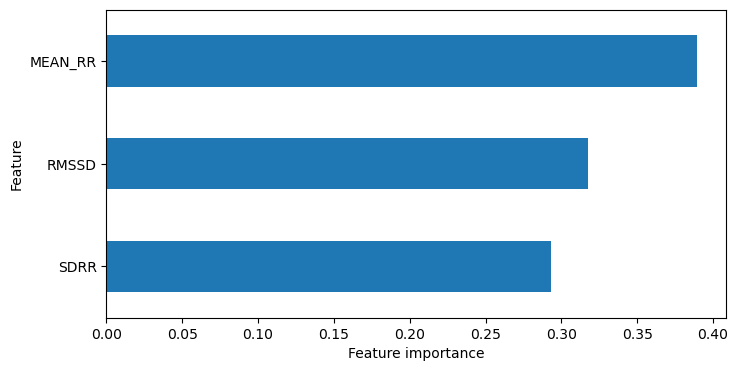

In [24]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=X_train.columns)
plt.figure(figsize=(8, 4))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [32]:
df = pd.DataFrame({'MEAN_RR':[898.2928684],
                   'SDRR': [108.1994235],
                   'RMSSD': [14.50760903]
                   })

In [33]:
print(model.predict(df))

[1]


In [40]:
def predict_stress(MEAN_RR, SDRR, RMSSD):
    df = pd.DataFrame({'MEAN_RR':[MEAN_RR],
                   'SDRR': [SDRR],
                   'RMSSD': [RMSSD]
                   })
    cat_i = model.predict(df)
    cat_i = cat_i[0]
    cat_a = ['no stress', 'interruption', 'time pressure']
    cat = cat_a[cat_i]
    cat_prob = model.predict_proba(df)[:, cat_i]
    prob_perc = np.mean(cat_prob)*100

    return prob_perc, cat

In [41]:
print(predict_stress(898.2928684, 108.1994235, 14.50760903))

(70.0, 'interruption')
